# Data Visualization with Matplotlib and Seaborn

[Univariate Data Visualization]()

[Bivariate Data Visualization]()

[Multivariate Data Visualization]()

    


In [126]:
import os
os.chdir("projects_on_GitHub/data_viz/Visualization_with_mpl_and_sns")

## Univariate Data Visualization

- bar chart


### Bar Chart

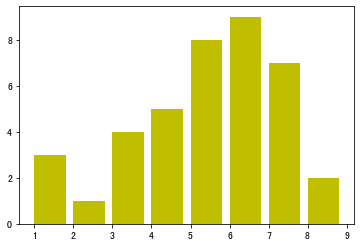

In [117]:
x = [i for i in range(1, 9)]
y = [3, 1, 4, 5, 8, 9, 7, 2]


plt.bar(x, y, align='edge', color='y');

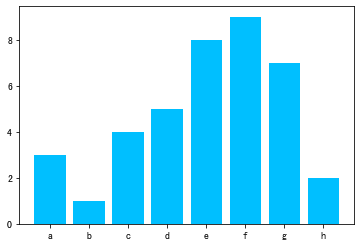

In [31]:
tick_name = [chr(i) for i in range(97, 97+len(x))]
plt.bar(x, y, color='deepskyblue', tick_label=tick_name);

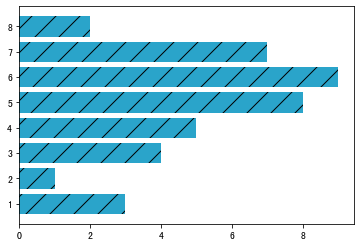

In [124]:
plt.barh(x, y, hatch='/', color='#2AA4CA');

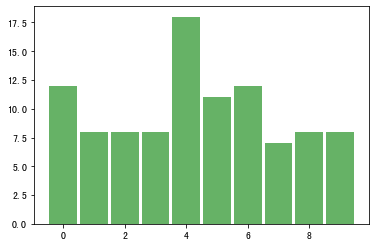

In [57]:
# Use plt.hist() to make bar chart
x = np.random.randint(0, 10, 100)
bins = range(0, 11)
plt.hist(x, bins=bins, align='left', color='g', histtype='bar', rwidth=.9, alpha=0.6);

### Pie Chart

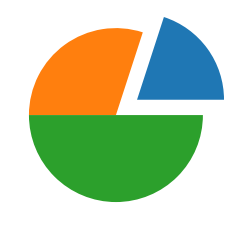

In [71]:
x = [2, 3, 5]

labels = ['a', 'b', 'c']

plt.pie(x, explode=[.3, 0, 0]);

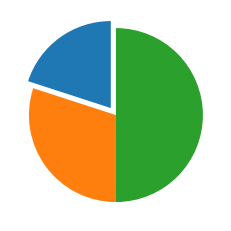

In [111]:
x = [2, 3, 5]

labels = ['a', 'b', 'c']

plt.pie(x, startangle=90, explode=[.1, 0, 0]);

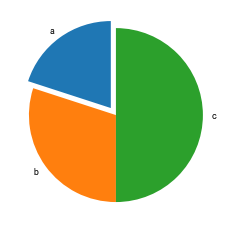

In [72]:
x = [2, 3, 5]

labels = ['a', 'b', 'c']

plt.pie(x, startangle=90, explode=[.1, 0, 0], labels=labels);

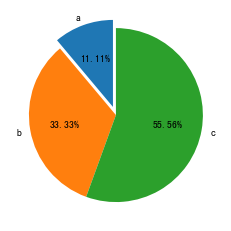

In [83]:
x = [1, 3, 5]

labels = ['a', 'b', 'c']

plt.pie(x, startangle=90, explode=[.1, 0, 0], labels=labels, autopct="%.2f%%");

In [137]:
pokemon = pd.read_csv("pokemon.csv")
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


#### 用sns.countplot()绘制统计柱状图

In [ ]:
# 用sns.countplot()绘制统计柱状图
base_color = sns.color_palette()[0] 

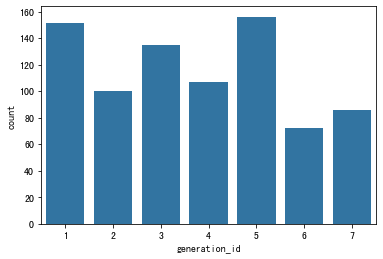

In [141]:
sns.countplot(data=pokemon, x='generation_id', color=base_color);

从高到低排列

In [148]:
# ordered as max to min
# static method to define the order (NOT recommended!!)
pokemon.generation_id.value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

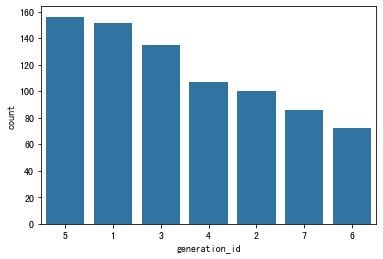

In [150]:
order = [5, 1, 3, 4, 2, 7, 6]

sns.countplot(data=pokemon, x='generation_id', color=base_color, order=order);

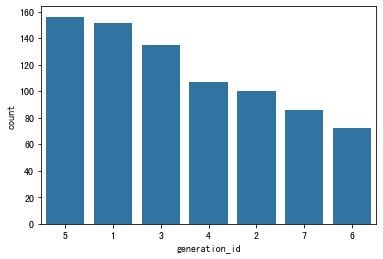

In [155]:
#  dynamic method to define the order (Recommended!!!)
order = pokemon.generation_id.value_counts().index.values
sns.countplot(data=pokemon, x='generation_id', color=base_color, order=order);

旋转刻度

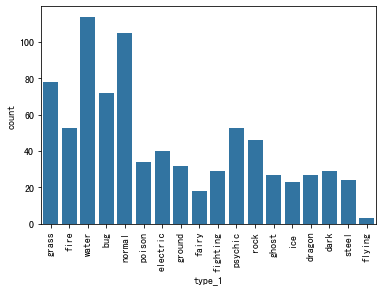

In [157]:
# Plot the Pokemon type on a Vertical bar chart
sns.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90);

旋转坐标轴

In [161]:
pokemon['type_1'].value_counts()

water       114
normal      105
grass        78
bug          72
fire         53
psychic      53
rock         46
electric     40
poison       34
ground       32
fighting     29
dark         29
dragon       27
ghost        27
steel        24
ice          23
fairy        18
flying        3
Name: type_1, dtype: int64

In [160]:
# Plot the Pokemon type on a Horizontal bar chart
type_order = pokemon['type_1'].value_counts().index
type_order

Index(['water', 'normal', 'grass', 'bug', 'fire', 'psychic', 'rock',
       'electric', 'poison', 'ground', 'fighting', 'dark', 'dragon', 'ghost',
       'steel', 'ice', 'fairy', 'flying'],
      dtype='object')

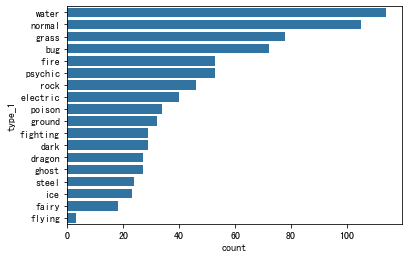

In [200]:
sns.countplot(data=pokemon, y='type_1', color=base_color, order=type_order);

**Make up some data to self-define a Categorical data type**

In [163]:
cat_type = pd.api.types.CategoricalDtype(['Strongly Disagree', \
                                          'Disagree', \
                                          'Neither Agree nor Disagree', \
                                          'Agree', \
                                          'Strongly Agree'], \
                                         ordered=True)


In [189]:
a = ['Strongly Disagree', 'Disagree', 'Neither Agree nor Disagree', 'Agree', 'Strongly Agree']
sample = np.random.choice(a, 1000)

In [190]:
data = pd.DataFrame(sample, columns=['attitude'], dtype=cat_type)
data.head()

,attitude
0,Agree
1,Neither Agree nor Disagree
2,Strongly Disagree
3,Strongly Agree
4,Strongly Agree


In [194]:
data.dtypes

attitude    category
dtype: object

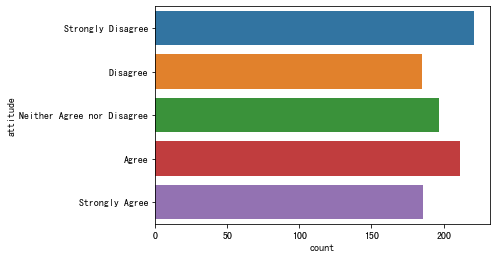

In [195]:
sns.countplot(data=data, y='attitude');

#### 用plt.bar()绘制统计柱状图

In [142]:
# Return the Series having unique values
x = pokemon['generation_id'].unique()
x

array([1, 2, 3, 4, 5, 6, 7])

In [143]:
# Return the Series having frequency count of each unique value
y = pokemon['generation_id'].value_counts(sort=False)
y

1    151
2    100
3    135
4    107
5    156
6     72
7     86
Name: generation_id, dtype: int64

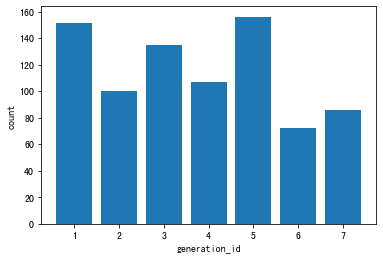

In [146]:
plt.bar(x, y)

# Labeling the axes
plt.xlabel('generation_id')
plt.ylabel('count');

In [ ]:
# Plot the Pokemon type on a Vertical bar chart
sb.countplot(data=pokemon, x='type_1', color=base_color);

# Use xticks to rotate the category labels (not axes) counter-clockwise
plt.xticks(rotation=90)

### Histograms

### Scatter Plot

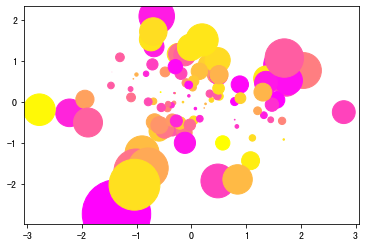

In [91]:
import matplotlib as mpl

a = np.random.randn(100)
b = np.random.randn(100)

plt.scatter(a, b, s=np.power(10*a+20*b, 2), c=np.random.rand(100), cmap=mpl.cm.spring);

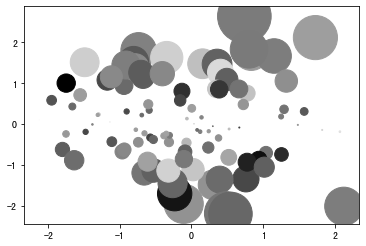

In [110]:
a = np.random.randn(100)
b = np.random.randn(100)

plt.scatter(a, b, s=np.power(a+20*b, 2), c=np.random.randn(100), cmap=mpl.cm.binary);

### Stem Plot